# Photutils tutorial


## Morphological properties
Source: https://photutils.readthedocs.io/en/stable/morphology.html

## Elliptical Isophote Analysis
Source: https://photutils.readthedocs.io/en/stable/isophote.html

In [35]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Gaussian2D
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_noise_image
from photutils.isophote import EllipseGeometry, Ellipse, build_ellipse_model, EllipseSample, EllipseFitter
from photutils import EllipticalAperture, data_properties
from astropy.io import fits

In [31]:
#data = g(x, y) + noise
hdu=fits.open('/Users/lasilla/data/2020-02-10/reduced/NGC2997/NGC2997_V.fits')
data = hdu['PRIMARY'].data

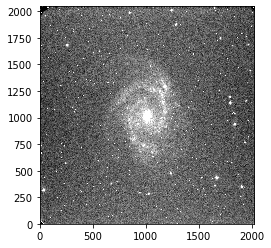

In [32]:
# how does it look?
plt.imshow(data, cmap='gray', origin='lower', vmin=16.4047, vmax=20.0625)

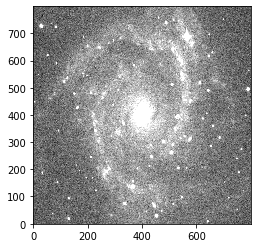

In [33]:
#cut
from astropy.nddata import Cutout2D
position = (1010, 1003)
size=(800,800)
cutout=Cutout2D (data,position,size)
plt.imshow(cutout.data,cmap='gray', origin='lower', vmin=16.4047, vmax=20.0625)

In [73]:
# user defines here the geometry parameters that will be used as first guess.
x0 = 400.    # center position
y0 = 400.    # center position
sma = 75.    # semimajor axis length in pixels
eps = 0.6    # ellipticity

# positon angle is defined in radians, counterclockwise from the
# +X axis (rotating towards the +Y axis). Here we use 35 degrees 
# as a first guess.
pa = 90. / 180. * np.pi

# note that the EllipseGeometry constructor has additional parameters with
# default values. Please see the documentation for details.
g = EllipseGeometry(x0, y0, sma, eps, pa)

# the custom geometry is passed to the Ellipse constructor.
ellipse = Ellipse(data, geometry=g)
isolist = ellipse.fit_image()
# the fit proceeds as usual.
isophote = ellipse.fit_isophote(sma=20.)

print(isophote)

sma        intens            intens_err      ... flag niter stop_code
                                             ...                     
---- ------------------ -------------------- ... ---- ----- ---------
20.0 17.710704954051565 0.032093973891891205 ...    0     2        -1


In [74]:
sample = EllipseSample(data, 7., geometry=g)
fitter = EllipseFitter(sample)
isophote = fitter.fit()

In [75]:
isophote.sample.values.shape

(3, 27)

In [76]:
isophote.sample.values[0]

array([0.05      , 0.19379081, 0.34993748, 0.53160087, 0.75055241,
       1.01559795, 1.32829862, 1.67668491, 2.03214823, 2.358214  ,
       2.62980785, 2.84452919, 3.01654168, 3.16511799, 3.30818248,
       3.46100331, 3.63699336, 3.84823113, 4.10430906, 4.40858236,
       4.75203895, 5.10894604, 5.44296236, 5.72552547, 5.95005616,
       6.12856377, 6.28005425])

In [77]:
isophote.sample.values[1]

array([6.95454734, 6.40423534, 5.50468638, 4.56722062, 3.77293649,
       3.19794652, 2.87037702, 2.81322974, 3.06686596, 3.68196858,
       4.65719881, 5.81353155, 6.73054795, 6.98985449, 6.5436107 ,
       5.6821395 , 4.73400194, 3.90506123, 3.28651903, 2.91157609,
       2.80184968, 2.99386569, 3.53903236, 4.45373401, 5.60200234,
       6.60107469, 6.99981987])

In [78]:
isophote.sample.values[2]

array([17.38964719, 17.17062069, 17.56346624, 17.57713078, 17.73146885,
       17.49250912, 17.68112963, 17.68083924, 17.75276442, 17.74475438,
       17.82356205, 17.97903028, 17.70063736, 17.34799244, 17.56004026,
       17.77160128, 17.85296758, 17.3653717 , 17.4022991 , 18.1781421 ,
       18.15498324, 17.86748666, 17.621383  , 17.50191345, 18.0618253 ,
       18.13102359, 17.50023414])

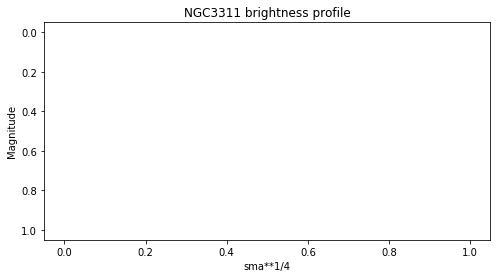

In [79]:
plt.rcParams['image.origin'] = 'lower'
plt.figure(figsize=(8, 4))

plt.scatter(isolist.sma**0.25, -2.5*np.log10(isolist.intens))
plt.title("NGC3311 brightness profile")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

In [71]:
isophote.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_err,grad_rerr,x0,x0_err,y0,y0_err,ndata,flag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
7.0,17.689067558696248,0.04952563626798121,0.6,0.0592695036539088,90.0,4.396352509527002,-0.03316577777561796,0.09278924987353175,2.7977408068429614,398.1405795193906,0.26647682064795947,400.0,0.4146932968224873,27,0,2,-1


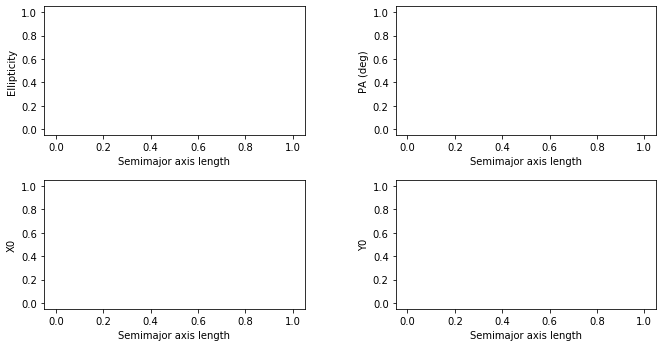

In [57]:
plt.figure(figsize=(10, 5))
plt.figure(1)

plt.subplot(221)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Ellipticity')

plt.subplot(222)
plt.errorbar(isolist.sma, isolist.pa/np.pi*180., yerr=isolist.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('PA (deg)')

plt.subplot(223)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('X0')

plt.subplot(224)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

ValueError: attempt to get argmin of an empty sequence

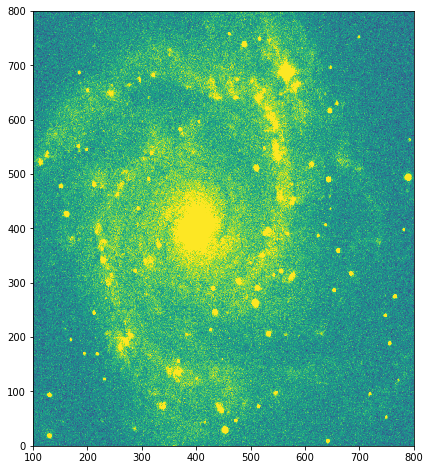

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cutout.data, vmin=16, vmax=20)
plt.axis([100, 800, 0, 800])

# this method on an IsophoteList instance will retrieve the isophote 
# that has the closest 'sma' from the passed argument.
iso = isolist.get_closest(40.)
print('Closest SMA = {:f}'.format(iso.sma))

# this method on an Isophote instance returns the (x, y) coordinates of 
# the sampled points in the image.
x, y, = iso.sampled_coordinates()

plt.plot(x, y, color='white')

In [59]:
plt.figure(figsize=(10, 3))
plt.plot(iso.sample.values[0] / np.pi*180., iso.sample.values[2])
plt.ylabel("Intensity")
plt.xlabel("Angle (deg)")

NameError: name 'iso' is not defined

<Figure size 720x216 with 0 Axes>